In [1]:
import numpy as np
import matplotlib.pyplot as plt

elastic_grub_hw = np.load('/home/daniel/Documents/data/xfer_learning/grub_data_collection/elastic_grub_data_MAIN/parsed_csvs_TEST/smooth_all_inputs.npy')
base_grub_hw = np.load('/home/daniel/Documents/data/xfer_learning/grub_data_collection/base_grub_data_MAIN/base_grub_test/smooth_all_inputs.npy')
sideways_grub_hw = np.load('/home/daniel/Documents/data/xfer_learning/grub_data_collection/sideways_weight_grub_data_MAIN/parsed_csvs_TEST/smooth_all_inputs.npy')

commands = np.load('/home/daniel/Documents/data/xfer_learning/grub_data_collection/test_dataset_commands.npy')

print(elastic_grub_hw.shape)
print(base_grub_hw.shape)
print(sideways_grub_hw.shape)
print(commands.shape)

(71289, 12)
(68346, 12)
(71297, 12)
(68346, 4)


In [2]:
u_hardware = elastic_grub_hw[:, -4:]
u_hardware2 = base_grub_hw[:, -4:]

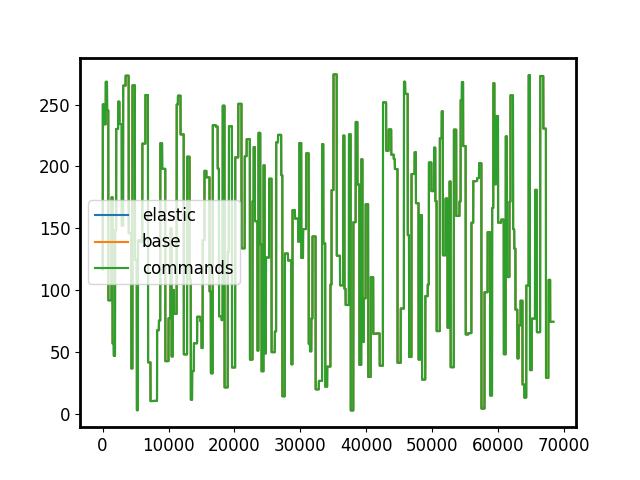

In [64]:
%matplotlib widget

import matplotlib.pyplot as plt

plt.plot(u_hardware[:, 1], label='elastic')
plt.plot(u_hardware2[:, 1], label='base')
plt.plot(commands[:,1], label='commands')
plt.legend()

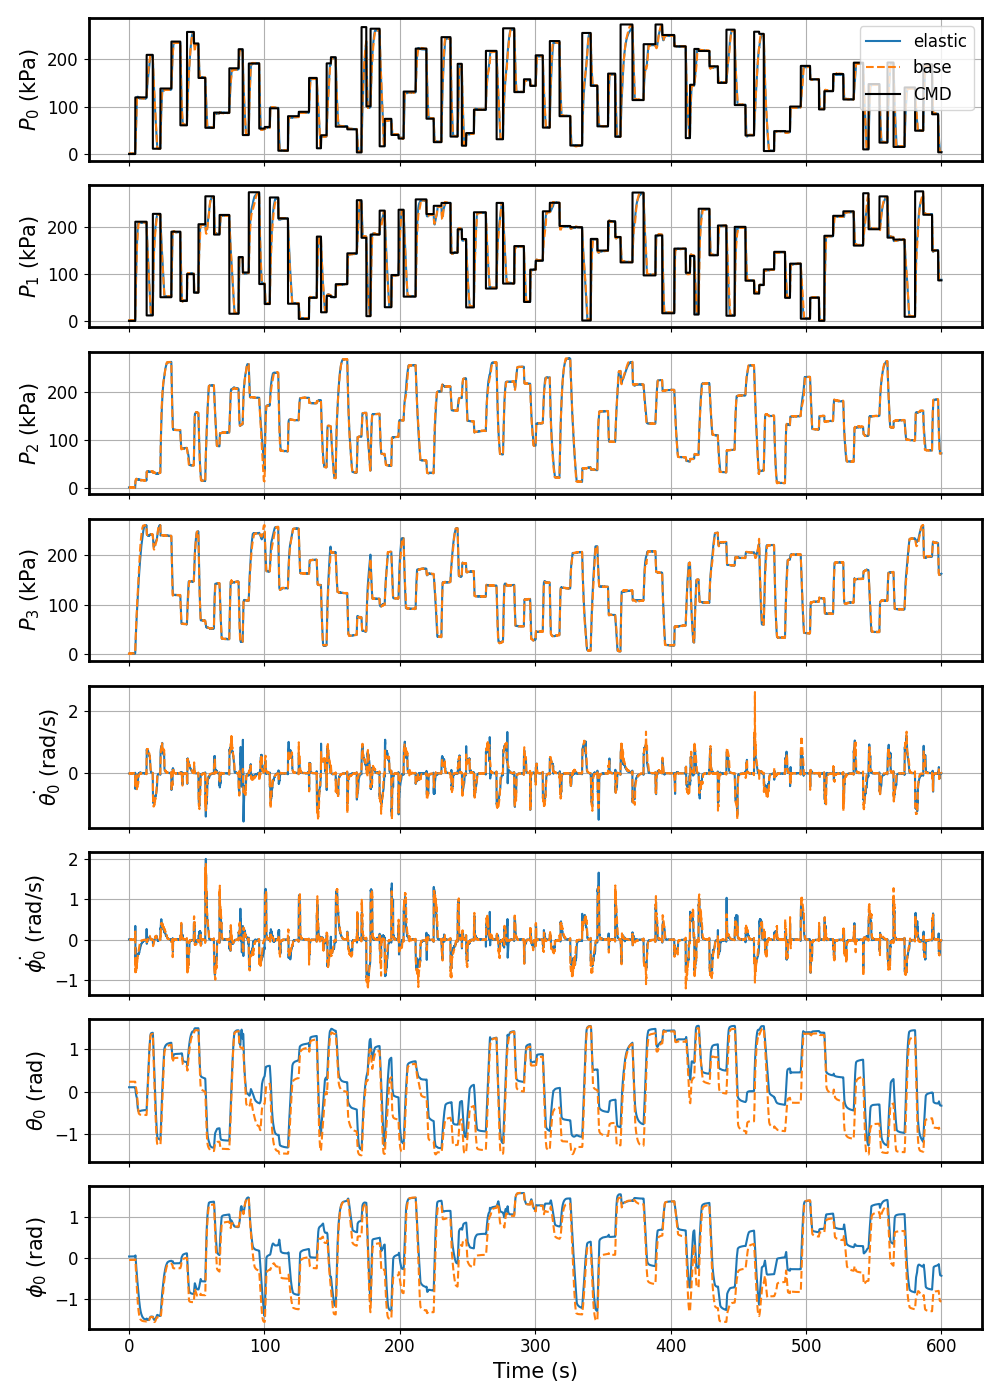

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(8, 1, figsize=(10, 14), sharex=True)
plt.rcParams.update({'font.size': 12})
plt.rc('pdf',fonttype = 42)

num_points = 60000
start = 0
dt = 0.01

t = np.arange(0, num_points*dt, dt)
label_font = 15

plt.rc('axes', labelsize=15)
plt.rc("axes", linewidth=2)

ax[0].plot(t, elastic_grub_hw[start:num_points+start, 0], label='elastic')
ax[0].plot(t, base_grub_hw[start:num_points+start, 0], "--", c="tab:orange", label='base')
ax[0].plot(t, u_hardware[start:num_points+start, 0], "k", label='CMD')
ax[0].set_ylabel('$P_0$ (kPa)', fontsize=label_font)
ax[0].legend()

ax[1].plot(t, elastic_grub_hw[start:num_points+start, 1], label='elastic')
ax[1].plot(t, base_grub_hw[start:num_points+start, 1], "--", c="tab:orange", label='base')
ax[1].plot(t, u_hardware[start:num_points+start, 1], "k", label='CMD')
ax[1].set_ylabel('$P_1$ (kPa)', fontsize=label_font)

ax[2].plot(t, elastic_grub_hw[start:num_points+start, 2], label='elastic')
ax[2].plot(t, base_grub_hw[start:num_points+start, 2], "--", c="tab:orange", label='base')
ax[2].set_ylabel('$P_2$ (kPa)', fontsize=label_font)

ax[3].plot(t, elastic_grub_hw[start:num_points+start, 3], label='elastic')
ax[3].plot(t, base_grub_hw[start:num_points+start, 3], "--", c="tab:orange", label='base')
ax[3].set_ylabel('$P_3$ (kPa)', fontsize=label_font)

ax[4].plot(t, elastic_grub_hw[start:num_points+start, 4], label='elastic')
ax[4].plot(t, base_grub_hw[start:num_points+start, 4], "--", c="tab:orange", label='base')
ax[4].set_ylabel('$\\dot{\\theta_0}}$ (rad/s)', fontsize=label_font)

ax[5].plot(t, elastic_grub_hw[start:num_points+start, 5], label='elastic')
ax[5].plot(t, base_grub_hw[start:num_points+start, 5], "--", c="tab:orange", label='base')
ax[5].set_ylabel('$\\dot{\\phi_0}}$ (rad/s)', fontsize=label_font)

ax[6].plot(t, elastic_grub_hw[start:num_points+start, 6], label='elastic')
ax[6].plot(t, base_grub_hw[start:num_points+start, 6], "--", c="tab:orange", label='base')
ax[6].set_ylabel('$\\theta_0$ (rad)', fontsize=label_font)

ax[7].plot(t, elastic_grub_hw[start:num_points+start, 7], label='elastic')
ax[7].plot(t, base_grub_hw[start:num_points+start, 7], "--", c="tab:orange", label='base')
ax[7].set_ylabel('$\\phi_0$ (rad)', fontsize=label_font)

for i in range(8):
    # ax[i].legend()
    ax[i].grid()

plt.xlabel('Time (s)', fontsize=label_font)
plt.tight_layout()


# plt.savefig('/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/hw_sim_comparison_grub.pdf', bbox_inches='tight')

In [3]:
from moldy.case_studies.grub_sim.model_grub_sim import GrubSim

grub_sys_id_model = GrubSim()

x_hardware = base_grub_hw[:, :8]
u_hardware = base_grub_hw[:, -4:]

start = 3000
num_points = 2000

dt = 0.01

x_sim = np.zeros((num_points, grub_sys_id_model.numStates)) 
x = x_hardware[start,:].reshape((1, grub_sys_id_model.numStates))

for i in range(start, num_points+start):
    x = grub_sys_id_model.forward_simulate_dt(x, u_hardware[i,:], dt)
    x_sim[i-start, :] = x.flatten()

GrubSim: mass: 5.0, stiffness: 14.07, damping: 2.73, alpha: 2.856, h: 0.23, r: 0.095


In [4]:
# Find IAE for sim vs hardware
iae_sim = np.sum(np.abs(x_sim - x_hardware[start:start+num_points, :]), axis=0)
print(iae_sim)

[19448.39781967 22133.21193765 16235.08736236 11043.38439417
   737.15311594   486.35667329   701.94468901   641.22139465]


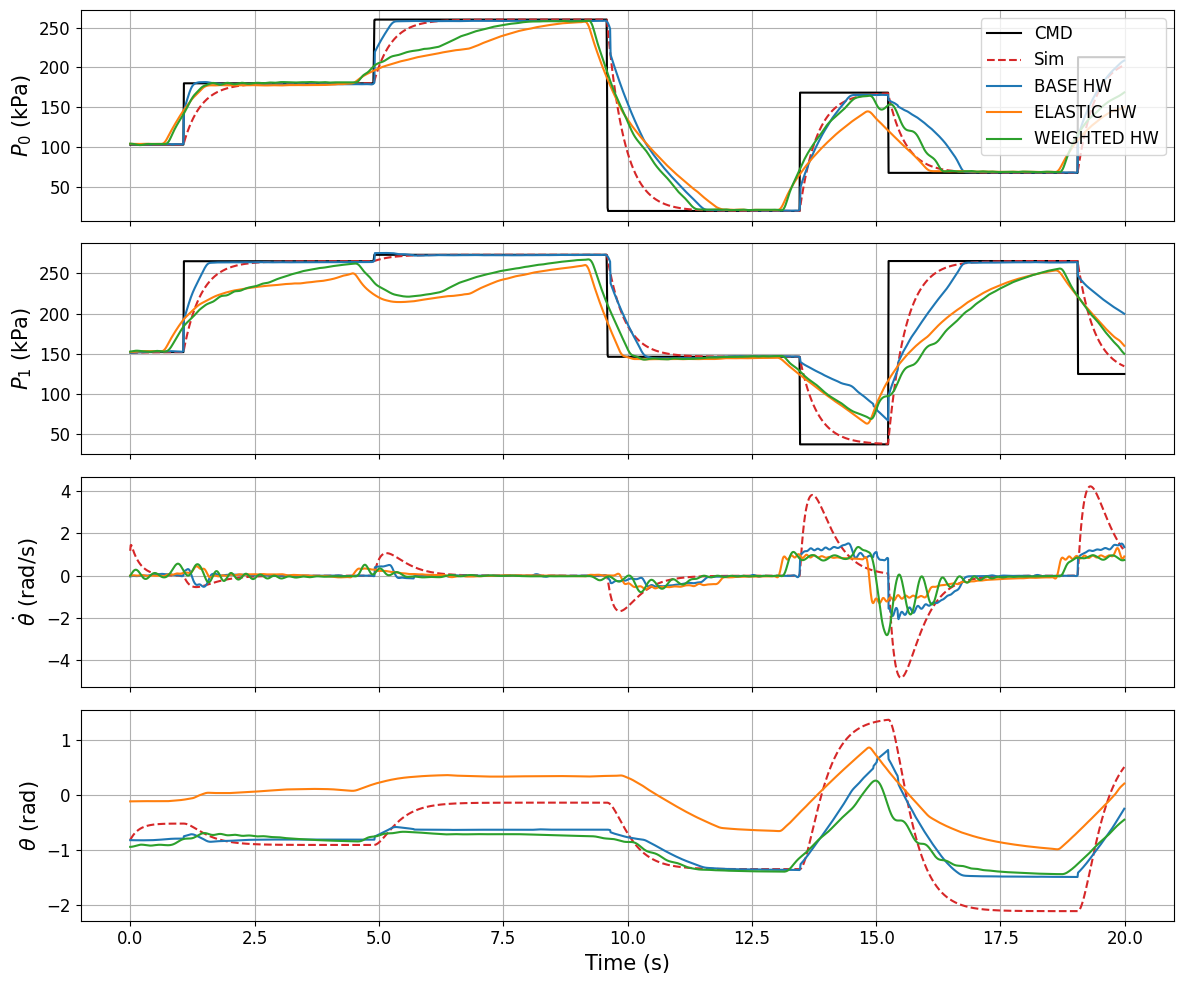

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
plt.rcParams.update({'font.size': 12})
plt.rc('pdf',fonttype = 42)

t = np.arange(0, num_points*dt, dt)
label_font = 15

start_other = start + 1485

plt.rc('axes', labelsize=15)
# plt.rc("axes", linewidth=1)

ax[0].plot(t, u_hardware[start:num_points+start, 0], "k", label='CMD')
ax[0].plot(t, x_sim[:, 0], "--", c="tab:red", label='Sim')
ax[0].plot(t, base_grub_hw[start:num_points+start, 0], label='BASE HW')
ax[0].plot(t, elastic_grub_hw[start_other:num_points+start_other, 0], label='ELASTIC HW')
ax[0].plot(t, sideways_grub_hw[start_other:num_points+start_other, 0], label='WEIGHTED HW')
# ax[0].set_ylim([-5, 85])
ax[0].set_ylabel('$P_0$ (kPa)', fontsize=label_font)
ax[0].legend()

ax[1].plot(t, u_hardware[start:num_points+start, 1], "k", label='CMD')
ax[1].plot(t, x_sim[:, 1], "--", c="tab:red", label='Sim')
ax[1].plot(t, base_grub_hw[start:num_points+start, 1], label='BASE HW')
ax[1].plot(t, elastic_grub_hw[start_other:num_points+start_other, 1], label='ELASTIC HW')
ax[1].plot(t, sideways_grub_hw[start_other:num_points+start_other, 1], label='WEIGHTED HW')
# ax[1].set_ylim([-5, 85])
ax[1].set_ylabel('$P_1$ (kPa)', fontsize=label_font)

# ax[2].plot(t, x_hardware[start:num_points+start, 2], label='HW')
# ax[2].plot(t, x_sim[:, 2], "--", c="tab:orange", label='Sim')
# # ax[2].set_ylim([-5, 85])
# ax[2].set_ylabel('$P_2$ (kPa)', fontsize=label_font)

# ax[3].plot(t, x_hardware[start:num_points+start, 3], label='HW')
# ax[3].plot(t, x_sim[:, 3], "--", c="tab:orange", label='Sim')
# # ax[3].set_ylim([-5, 85])
# ax[3].set_ylabel('$P_3$ (kPa)', fontsize=label_font)

ax[2].plot(t, x_sim[:, 4], "--", c="tab:red", label='Sim')
ax[2].plot(t, base_grub_hw[start:num_points+start, 4], label='BASE HW')
ax[2].plot(t, elastic_grub_hw[start_other:num_points+start_other, 4], label='ELASTIC HW')
ax[2].plot(t, sideways_grub_hw[start_other:num_points+start_other, 4], label='WEIGHTED HW')
# ax[2].set_ylim([-1.25, 1.5])
ax[2].set_ylabel('$\\dot{\\theta}}$ (rad/s)', fontsize=label_font)

# ax[5].plot(t, x_hardware[start:num_points+start, 5], label='HW')
# ax[5].plot(t, x_sim[:, 5], "--", c="tab:orange", label='Sim')
# # ax[3].set_ylim([-1.25, 1.5])
# ax[5].set_ylabel('$\\dot{\\phi_0}}$ (rad/s)', fontsize=label_font)

ax[3].plot(t, x_sim[:, 6], "--", c="tab:red", label='Sim')
ax[3].plot(t, base_grub_hw[start:num_points+start, 6], label='BASE HW')
ax[3].plot(t, elastic_grub_hw[start_other:num_points+start_other, 6], label='ELASTIC HW')
ax[3].plot(t, sideways_grub_hw[start_other:num_points+start_other, 6], label='WEIGHTED HW')

# ax[4].set_ylim(-0.8, 0.5)
ax[3].set_ylabel('$\\theta$ (rad)', fontsize=label_font)

# ax[7].plot(t, x_hardware[start:num_points+start, 7], label='Hardware')
# ax[7].plot(t, x_sim[:, 7], "--", c="tab:orange", label='Simulation')
# # ax[5].set_ylim(-0.8, 0.5)
# ax[7].set_ylabel('$\\phi_0$ (rad)', fontsize=label_font)

for i in range(4):
    # ax[i].legend()
    ax[i].grid()

plt.xlabel('Time (s)', fontsize=label_font)
plt.tight_layout()


plt.savefig('/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/experiment_comparison_grub.pdf', bbox_inches='tight')